In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.tabular import *

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = untar_data(URLs.ADULT_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/adult_sample/models'),
 PosixPath('/root/.fastai/data/adult_sample/adult.csv'),
 PosixPath('/root/.fastai/data/adult_sample/export.pkl')]

In [0]:
df = pd.read_csv(path/'adult.csv')

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [0]:
TabularList.from_csv??

In [0]:
dep_var = 'salary'
cat_var = ['workclass', 'education', 'marital-status', 'occupation',
           'relationship', 'race', 'sex', 'native-country']
cont_var = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
            'hours-per-week']
procs = [FillMissing, Categorify, Normalize]

In [0]:
test = TabularList.from_df(df.iloc[800:1000].copy(), path=path,
                           cat_names=cat_var, cont_names=cont_var)

In [0]:
data = (TabularList.from_df(df, path=path, cat_names=cat_var,
                            cont_names=cont_var, procs=procs)
        .split_by_idx(list(range(800, 1000)))
        .label_from_df(cols=dep_var)
        .add_test(test)
        .databunch())

In [16]:
data.show_batch()

workclass,education,marital-status,occupation,relationship,race,sex,native-country,education-num_na,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target
Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States,False,-0.1163,-0.1493,-0.4224,-0.1459,-0.2164,-0.0356,<50k
Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,False,-0.5561,-1.3959,-0.4224,-0.1459,-0.2164,1.1793,<50k
Self-emp-not-inc,HS-grad,Divorced,Transport-moving,Not-in-family,White,Male,United-States,False,0.5434,-0.8956,-0.4224,-0.1459,-0.2164,0.7743,<50k
Private,HS-grad,Divorced,Other-service,Not-in-family,White,Female,United-States,False,1.0564,1.1524,-0.4224,-0.1459,-0.2164,-0.0356,<50k
Private,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,United-States,False,-0.1896,0.3300,1.1422,-0.1459,-0.2164,0.7743,>=50k


In [31]:
data.valid_ds

LabelList (200 items)
x: TabularList
workclass  Private; education  Some-college; marital-status  Divorced; occupation  Handlers-cleaners; relationship  Unmarried; race  White; sex  Female; native-country  United-States; education-num_na True; age 0.4701; fnlwgt -0.8793; education-num -0.0312; capital-gain -0.1459; capital-loss -0.2164; hours-per-week -0.0356; ,workclass  Self-emp-inc; education  Prof-school; marital-status  Married-civ-spouse; occupation  Prof-specialty; relationship  Husband; race  White; sex  Male; native-country  United-States; education-num_na True; age 0.5434; fnlwgt 0.0290; education-num -0.0312; capital-gain 1.8829; capital-loss -0.2164; hours-per-week 1.5843; ,workclass  Private; education  Assoc-voc; marital-status  Divorced; occupation #na#; relationship  Not-in-family; race  White; sex  Male; native-country  United-States; education-num_na True; age -0.1896; fnlwgt 1.7704; education-num -0.0312; capital-gain -0.1459; capital-loss -0.2164; hours-per-week -0.

In [0]:
learn = tabular_learner(data, layers=[200, 100], metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


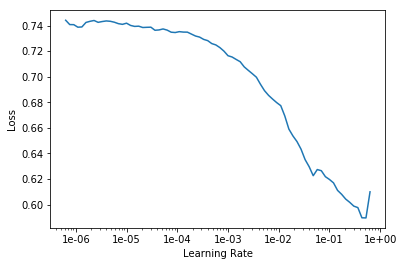

In [19]:
learn.lr_find()
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(5, slice(5e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.348948,0.361284,0.830000,00:07
1,0.347571,0.363189,0.840000,00:08
2,0.343183,0.339204,0.855000,00:08
3,0.332009,0.338415,0.850000,00:07
4,0.323541,0.343124,0.850000,00:07


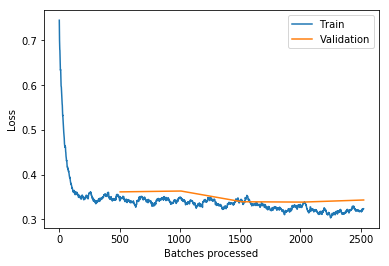

In [21]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


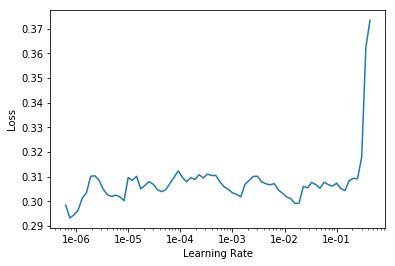

In [24]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.load('stage-1');

In [35]:
learn.fit_one_cycle(5, slice(1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.306822,0.343808,0.845000,00:07
1,0.308140,0.341513,0.855000,00:08
2,0.313656,0.340219,0.860000,00:08
3,0.317599,0.338099,0.855000,00:08
4,0.313908,0.337704,0.855000,00:08


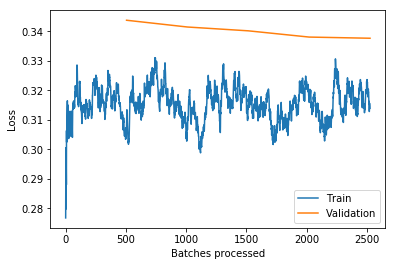

In [36]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-2')